### Import Libraries and Modules

In [1]:
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Convolution2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


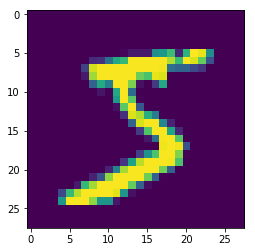

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Notes
Before we get into the four block codes let's iterate over the 9 steps which were explained during the session to improve the performance of the model gradually.

step 1: Started with a vanila network with very basic archtiecture. Kernel of higher dimensions are used which is not used anymore. Validation accuracy of 98.28%, with 68k Parameters in 10 epochs.

step 2: Introduced kernels with standard dimension i.e 3x3 or 1x1 and obviously max-pooling was introduced. Only when the output dimension is 7x7, kernel with 7x7 is introduced to make the output dimension match with the number of classes using 10 channels. The kernel channels were in the range of 32, 64, 128. Validation accuracy is 99.18% with 195k parameters in 10 epochs.

step 3: The number of channels in each layer was reduced to smaller numbers, which reduced the total number of parameters. Validation accuracy of 98.84%, wtih 10k parametes in 10 epochs.

step 4: Batch Normalization was introduced. Validation accuracy of 98.97%, with 11k parametes in 10 epochs and 99.08% accuracy in 30 epochs.

step 5: Number of channels in each layer is increased to increase the accuracy on top of the current one. Validation accuracy of 99.05% with 18.4k parameters in 20 epochs.

step 6: Dropout is introduced in two places. Validation accuracy is 99.4%, with 18.4k parameters in 21 epochs.

step 7: Variable learning rate is introduced where the learning rate changes in every epoch based on the function specified. Validation accuracy of 99.42% with 18.4k paramters in 14 epochs.

step 8: Dropout is used after every convolution block(Conv + BN) with 0.1 value. The total number of parameters are also reduced by reducing number of channels in layers. Validation accracy is 99.46% with 16.6k parameters in 11 epochs.

step 9: The number of parametes are reduced more and the accuracy is 99.44% with 13k parametes in 15 epochs.

### First Code Block
#### Header Note: Let's first start with vanila network, where we will keep the numbers of channels in such a way that total number of parameters are less than 15k and will follow the standards of making a cnn architecture from scratch. One thing I wanna mention here is, in the  last assignment one mistake I made was I was adding convolution blocks till the image dimension comes down to 1x1. Which is wrong, because at this point the matrix won't have enough information to represent the image. So inplace of that I am gonna use 4x4 convolution in the final layer to get the final classification output, because globalAveragePooling was not introduced till that session.

In [0]:
model = Sequential()

model.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(Convolution2D(15, 3, activation='relu')) #24
model.add(Convolution2D(20, 3, activation='relu')) #22
model.add(Convolution2D(10, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2,2))) #11

model.add(Convolution2D(10, 3, activation='relu')) #9
model.add(Convolution2D(15, 3, activation='relu')) #7
model.add(Convolution2D(20, 3, activation='relu')) #5

model.add(Convolution2D(10, 5, activation='relu')) #1

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0905 16:28:19.326583 139725091018624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 16:28:19.373362 139725091018624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 16:28:19.381644 139725091018624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 16:28:19.454867 139725091018624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 15)        1365      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 20)        2720      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 10)        210       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 10)          910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 15)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0905 16:28:19.574779 139725091018624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0905 16:28:19.621370 139725091018624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0905 16:28:21.258214 139725091018624 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0905 16:28:21.353267 139725091018624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 28s 464us/step - loss: 1.0881 - acc: 0.5760
Epoch 2/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.7818 - acc: 0.6779
Epoch 3/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.7637 - acc: 0.6808
Epoch 4/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.7548 - acc: 0.6823
Epoch 5/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.7514 - acc: 0.6829
Epoch 6/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.7466 - acc: 0.6841
Epoch 7/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.7432 - acc: 0.6846
Epoch 8/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.7392 - acc: 0.6851
Epoch 9/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.7375 - acc: 0.6857
Epoch 10/10
60000/60000 [==============================] - 21s 357us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.7434452826976776, 0.6836]


### Second Code Block
#### Header Note: Now that we have the basic struture of the network and the total number of parameters are 14400. Let's introduce Batch Normalization and Dropout to each of the layers.

In [0]:
model = Sequential()

model.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(15, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, activation='relu')) #22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu')) #22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2,2))) #11

model.add(Convolution2D(10, 3, activation='relu')) #9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(15, 3, activation='relu')) #7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, activation='relu')) #5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 5, activation='relu')) #1

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 15)        1365      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 15)        60        
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 20)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 41s 688us/step - loss: 0.2512 - acc: 0.9200
Epoch 2/10
60000/60000 [==============================] - 40s 660us/step - loss: 0.0740 - acc: 0.9771
Epoch 3/10
60000/60000 [==============================] - 40s 663us/step - loss: 0.0577 - acc: 0.9818
Epoch 4/10
60000/60000 [==============================] - 39s 658us/step - loss: 0.0502 - acc: 0.9841
Epoch 5/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0454 - acc: 0.9855
Epoch 6/10
60000/60000 [==============================] - 39s 656us/step - loss: 0.0414 - acc: 0.9870
Epoch 7/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0370 - acc: 0.9885
Epoch 8/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.0346 - acc: 0.9890
Epoch 9/10
60000/60000 [==============================] - 39s 654us/step - loss: 0.0331 - acc: 0.9897
Epoch 10/10
60000/60000 [==============================] - 39s 651us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.028191434921199108, 0.9911]


### Third Code Block
#### Header Note: Because of the introduction of Batch Normalisation and Dropout the accuracy increased from 68.36% to 99.11%. In this block the variable learning rate will be introduced.

In [27]:
model = Sequential()

model.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(15, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, activation='relu')) #22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu')) #22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2,2))) #11

model.add(Convolution2D(10, 3, activation='relu')) #9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(15, 3, activation='relu')) #7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, activation='relu')) #5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 5, activation='relu')) #1

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_22 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 15)        1365      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 15)        60        
_________________________________________________________________
dropout_23 (Dropout)         (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 20)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [33]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 40s 669us/step - loss: 0.0467 - acc: 0.9855 - val_loss: 0.0313 - val_acc: 0.9897
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 40s 671us/step - loss: 0.0316 - acc: 0.9901 - val_loss: 0.0291 - val_acc: 0.9918
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 40s 665us/step - loss: 0.0281 - acc: 0.9909 - val_loss: 0.0233 - val_acc: 0.9926
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 40s 665us/step - loss: 0.0246 - acc: 0.9922 - val_loss: 0.0226 - val_acc: 0.9927
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [35]:
print(score)

[0.01880754358768354, 0.994]
